In [1]:
#Import dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func
import sqlite3
import pandas as pd

#Connect to sqlite
connection = sqlite3.connect(":memory:")

cursor = connection.cursor()

#Read in sql file
sql_file = open("living_in_nashville.sql", encoding="utf8")
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)


In [2]:
#Create housing DataFrame
housing_list = []
for row in cursor.execute("SELECT * FROM Nashville_Housing_Data"):
    housing_list.append(row)

#housing_df
housing_df = pd.DataFrame(housing_list)
housing_df.columns = ['Unnamed:0',"ParcelID","LandUse","PropertyAddress","Suite/Condo#","PropertyCity","ZipCode","SaleDate","SalePrice","LegalReference","SoldAsVacant","MultipleParcelsInvolvedinSale","OwnerName","Address","City","State","Acreage","TaxDistrict","Neighborhood","image","LandValue","BuildingValue","TotalValue","FinishedArea","FoundationType","YearBuilt","ExteriorWall","Grade","Bedrooms","FullBath","HalfBath"]
housing_df.head()


,Unnamed:0,ParcelID,LandUse,PropertyAddress,Suite/Condo#,PropertyCity,ZipCode,SaleDate,SalePrice,LegalReference,...,BuildingValue,TotalValue,FinishedArea,FoundationType,YearBuilt,ExteriorWall,Grade,Bedrooms,FullBath,HalfBath
0,32,162 02 0A 008.00,SINGLE FAMILY,744 HILL BENNETT CIR,None,ANTIOCH,37013,1/7/2013,134825,20130108-0002492,...,None,None,None,None,None,None,None,None,None,None
1,33,162 06 0 012.00,SINGLE FAMILY,152 TUSCULUM RD,None,ANTIOCH,37013,1/15/2013,109900,20130124-0007776,...,77400,101400,1247,CRAWL,1968,BRICK,C,3,1,1
2,34,162 13 0A 015.00,SINGLE FAMILY,2321 GREEN TRAILS CT,None,ANTIOCH,37013,1/4/2013,152950,20130108-0002487,...,None,None,None,None,None,None,None,None,None,None
3,45,173 04 0A 202.00,SINGLE FAMILY,5224 RIDGEFALLS WAY,None,ANTIOCH,37013,1/18/2013,195000,20130122-0007001,...,None,None,None,None,None,None,None,None,None,None
4,46,173 04 0A 274.00,SINGLE FAMILY,5457 OAK CHASE DR,None,ANTIOCH,37013,1/18/2013,230000,20130128-0008839,...,None,None,None,None,None,None,None,None,None,None


In [3]:
# Create Parks DataFrame
parks_list = []
for row in cursor.execute("SELECT * FROM Park_Locations"):
    parks_list.append(row)

parks_df = pd.DataFrame(parks_list)
parks_df.columns= ["ParkName","ZipCodes","Acres","CommunityCenter","NatureCenter","Playground","ADAAccessible","RestroomsAvailable","DogPark","BaseballFields","BasketballCourts","SoccerFields","Football&Multi-purposeFields","TennisCourts","DiscGolf","SwimmingPool","GolfCourse","Walk&JogPaths","HistoricFeatures","MappedLocation","Lat","Lng"]
parks_df=parks_df.replace({'Yes':True,'No':False})
parks_df.head()

,ParkName,ZipCodes,Acres,CommunityCenter,NatureCenter,Playground,ADAAccessible,RestroomsAvailable,DogPark,BaseballFields,...,Football&Multi-purposeFields,TennisCourts,DiscGolf,SwimmingPool,GolfCourse,Walk&JogPaths,HistoricFeatures,MappedLocation,Lat,Lng
0,Antioch Park,37013,7.98,True,False,True,True,True,False,False,...,False,False,False,False,False,True,False,"5023 Blue Hole Rd Antioch, TN 37013",36.055271,-86.672392
1,Cane Ridge Park,37013,274.13,False,False,True,True,True,False,True,...,True,True,False,False,False,True,False,"419 Battle Rd Antioch, TN 37013",35.994965,-86.624342
2,Cecil Rhea Crawford Park,37013,6.25,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,"6043 Cane Ridge Rd Antioch, TN 37013",36.001427,-86.636764
3,Southeast Community Center Park,37013,12.14,True,False,True,True,True,False,False,...,False,False,False,False,False,True,False,"5260 Hickory Hollow Pkwy Antioch, TN 37013",36.048466,-86.657263
4,William A. Pitts Park,37013,26.94,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,"299 Tusculum Rd Nashville, TN",36.059541,-86.706819


In [4]:
#Create list for of whether Walk and Jog is True
walk_list_per_zip = parks_df.groupby('ZipCodes')['Walk&JogPaths'].apply(list)
walk_per_zip = []
for code in walk_list_per_zip:
    if True in code:
        walk_per_zip.append(True)
    else: walk_per_zip.append(False)
walk_per_zip

[True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False]

In [5]:
#Create list for baseball
baseball_per_zip = parks_df.groupby('ZipCodes')['BaseballFields'].apply(list)
baseball_list = []
for code in baseball_per_zip:
    if True in code:
        baseball_list.append(True)
    else: baseball_list.append(False)
#Create list for basketball
basketball_per_zip = parks_df.groupby('ZipCodes')['BasketballCourts'].apply(list)
basketball_list = []
for code in basketball_per_zip:
    if True in code:
        basketball_list.append(True)
    else: basketball_list.append(False)
#Create list for Soccer
soccer_per_zip = parks_df.groupby('ZipCodes')['SoccerFields'].apply(list)
soccer_list = []
for code in soccer_per_zip:
    if True in code:
        soccer_list.append(True)
    else: soccer_list.append(False)
#Create list for Football
football_per_zip = parks_df.groupby('ZipCodes')['Football&Multi-purposeFields'].apply(list)
football_list = []
for code in football_per_zip:
    if True in code:
        football_list.append(True)
    else: football_list.append(False)
#Create list for Tennis
tennis_per_zip = parks_df.groupby('ZipCodes')['TennisCourts'].apply(list)
tennis_list = []
for code in tennis_per_zip:
    if True in code:
        tennis_list.append(True)
    else: tennis_list.append(False)

In [6]:
#Zip together individual sport lists
sports_tuples = list(zip(baseball_list,basketball_list,soccer_list,football_list,tennis_list))
sports_tuples

[(True, True, True, True, True),
 (False, False, False, False, False),
 (True, False, False, False, False),
 (False, False, False, False, True),
 (False, False, False, False, False),
 (True, True, True, True, True),
 (True, True, False, False, True),
 (True, False, False, False, False),
 (True, False, True, False, True),
 (False, True, False, True, False),
 (True, True, True, False, True),
 (False, True, False, False, True),
 (True, True, True, True, True),
 (True, True, False, False, True),
 (True, True, False, False, True),
 (True, True, False, True, True),
 (True, True, False, False, True),
 (True, False, False, True, False),
 (True, True, True, True, False),
 (False, False, False, False, True),
 (False, False, False, False, False),
 (True, False, True, False, True),
 (True, True, True, False, True),
 (True, False, False, True, True),
 (True, True, True, True, True),
 (True, True, False, False, True),
 (False, False, False, False, False),
 (True, False, True, False, True),
 (False, 

In [7]:
#Create list for whether any of the sports lists contain true in each zip
sports_list = []
for row in sports_tuples:
    if True in row:
        sports_list.append(True)
    else: sports_list.append(False)

sports_list

[True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False]

In [8]:
#group by zip code and find if there is a yes in ADA column

ada_list_per_zip = parks_df.groupby('ZipCodes')['ADAAccessible'].apply(list)
ada_per_zip = []
for code in ada_list_per_zip:
    if True in code:
        ada_per_zip.append(True)
    else: ada_per_zip.append(False)
ada_per_zip

[True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False]

In [9]:
# Create parks per zip code variable
parks_per_zip = parks_df.groupby('ZipCodes').size()
parks_per_zip

ZipCodes
37013     5
37015     1
37018     1
37027     1
37076     2
37080     2
37115     3
37138     1
37189     1
37201     2
37203    10
37204     2
37205     2
37206     9
37207     6
37208     7
37209     8
37210     3
37211     8
37212     3
37213     1
37214     3
37215     3
37216     2
37217     4
37218     4
37219     1
37221     5
37228     1
37243     1
dtype: int64

In [10]:
# Create variable for total acres of parks per zip code
acres_per_zip = parks_df.groupby('ZipCodes').sum()['Acres']
acres_per_zip

ZipCodes
37013     327.44
37015    2168.79
37018       4.40
37027       6.95
37076      31.95
37080     116.79
37115    1001.91
37138       2.39
37189      19.70
37201      12.85
37203     239.38
37204      20.76
37205      21.46
37206    1365.67
37207      70.23
37208      93.85
37209     310.21
37210       9.06
37211     353.11
37212       9.71
37213       4.76
37214     454.41
37215      17.80
37216      24.84
37217     546.52
37218     910.90
37219       0.28
37221    3201.56
37228     261.17
37243       6.01
Name: Acres, dtype: float64

In [11]:
#Create new DataFrame with created variables
parks_new_tuples = list(zip(parks_per_zip, acres_per_zip, ada_per_zip, sports_list, walk_per_zip))
parks_new_df = pd.DataFrame(parks_new_tuples, columns=["Parks Per Zip", "Acres of Parks Per Zip", "ADA Park in Zip", "Sports Fields in Zip", "Walk Path in Zip"], index=parks_per_zip.index)
parks_new_df

,Parks Per Zip,Acres of Parks Per Zip,ADA Park in Zip,Sports Fields in Zip,Walk Path in Zip
ZipCodes,,,,,
37013,5,327.44,True,True,True
37015,1,2168.79,False,False,False
37018,1,4.40,False,True,False
37027,1,6.95,True,True,True
37076,2,31.95,True,False,False
37080,2,116.79,True,True,True
37115,3,1001.91,True,True,True
37138,1,2.39,False,True,False
37189,1,19.70,False,True,False


In [12]:
# Merge new parks df with housing df
new_housing_df = housing_df.merge(parks_new_df, left_on="ZipCode", right_on="ZipCodes")
new_housing_df.head()

,Unnamed:0,ParcelID,LandUse,PropertyAddress,Suite/Condo#,PropertyCity,ZipCode,SaleDate,SalePrice,LegalReference,...,ExteriorWall,Grade,Bedrooms,FullBath,HalfBath,Parks Per Zip,Acres of Parks Per Zip,ADA Park in Zip,Sports Fields in Zip,Walk Path in Zip
0,32,162 02 0A 008.00,SINGLE FAMILY,744 HILL BENNETT CIR,None,ANTIOCH,37013,1/7/2013,134825,20130108-0002492,...,None,None,None,None,None,5,327.44,True,True,True
1,33,162 06 0 012.00,SINGLE FAMILY,152 TUSCULUM RD,None,ANTIOCH,37013,1/15/2013,109900,20130124-0007776,...,BRICK,C,3,1,1,5,327.44,True,True,True
2,34,162 13 0A 015.00,SINGLE FAMILY,2321 GREEN TRAILS CT,None,ANTIOCH,37013,1/4/2013,152950,20130108-0002487,...,None,None,None,None,None,5,327.44,True,True,True
3,45,173 04 0A 202.00,SINGLE FAMILY,5224 RIDGEFALLS WAY,None,ANTIOCH,37013,1/18/2013,195000,20130122-0007001,...,None,None,None,None,None,5,327.44,True,True,True
4,46,173 04 0A 274.00,SINGLE FAMILY,5457 OAK CHASE DR,None,ANTIOCH,37013,1/18/2013,230000,20130128-0008839,...,None,None,None,None,None,5,327.44,True,True,True


In [13]:
new_housing_df = new_housing_df.drop(columns=["LandValue","BuildingValue","TotalValue","ParcelID", "LandUse","PropertyAddress","Suite/Condo#","Unnamed:0","PropertyCity","SaleDate","LegalReference","ExteriorWall","Grade","SoldAsVacant","MultipleParcelsInvolvedinSale","OwnerName","Address","City","State", "FoundationType","TaxDistrict","image","Neighborhood"])


In [14]:
new_housing_df = new_housing_df.dropna()
new_housing_df

,ZipCode,SalePrice,Acreage,FinishedArea,YearBuilt,Bedrooms,FullBath,HalfBath,Parks Per Zip,Acres of Parks Per Zip,ADA Park in Zip,Sports Fields in Zip,Walk Path in Zip
1,37013,109900,0.28,1247,1968,3,1,1,5,327.44,True,True,True
29,37013,123900,0.29,1515,1979,3,2,0,5,327.44,True,True,True
30,37013,107000,0.3,1087,1987,3,2,0,5,327.44,True,True,True
34,37013,144900,0.27,1688,2001,3,2,1,5,327.44,True,True,True
43,37013,147362,0.23,2193.5,1988,3,3,0,5,327.44,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15407,37215,999000,1.98,4120,1965,4,3,1,3,17.80,True,True,True
15408,37215,1095000,1.86,4024,1963,4,4,1,3,17.80,True,True,True
15409,37215,490000,1.5,3691.20007,1966,4,3,0,3,17.80,True,True,True
15410,37215,810000,2.4,3942.11997,1969,4,4,0,3,17.80,True,True,True


In [15]:
zip_df = pd.get_dummies(new_housing_df["ZipCode"])
zip_df

,37013,37027,37076,37080,37115,37138,37189,37204,37205,37215
1,1,0,0,0,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0
30,1,0,0,0,0,0,0,0,0,0
34,1,0,0,0,0,0,0,0,0,0
43,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15407,0,0,0,0,0,0,0,0,0,1
15408,0,0,0,0,0,0,0,0,0,1
15409,0,0,0,0,0,0,0,0,0,1
15410,0,0,0,0,0,0,0,0,0,1


In [16]:
new_housing_df = new_housing_df.merge(zip_df, left_index=True, right_index=True)
new_housing_df = new_housing_df.drop(columns=["ZipCode"])
new_housing_df

,SalePrice,Acreage,FinishedArea,YearBuilt,Bedrooms,FullBath,HalfBath,Parks Per Zip,Acres of Parks Per Zip,ADA Park in Zip,...,37013,37027,37076,37080,37115,37138,37189,37204,37205,37215
1,109900,0.28,1247,1968,3,1,1,5,327.44,True,...,1,0,0,0,0,0,0,0,0,0
29,123900,0.29,1515,1979,3,2,0,5,327.44,True,...,1,0,0,0,0,0,0,0,0,0
30,107000,0.3,1087,1987,3,2,0,5,327.44,True,...,1,0,0,0,0,0,0,0,0,0
34,144900,0.27,1688,2001,3,2,1,5,327.44,True,...,1,0,0,0,0,0,0,0,0,0
43,147362,0.23,2193.5,1988,3,3,0,5,327.44,True,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15407,999000,1.98,4120,1965,4,3,1,3,17.80,True,...,0,0,0,0,0,0,0,0,0,1
15408,1095000,1.86,4024,1963,4,4,1,3,17.80,True,...,0,0,0,0,0,0,0,0,0,1
15409,490000,1.5,3691.20007,1966,4,3,0,3,17.80,True,...,0,0,0,0,0,0,0,0,0,1
15410,810000,2.4,3942.11997,1969,4,4,0,3,17.80,True,...,0,0,0,0,0,0,0,0,0,1


In [17]:
new_housing_df.columns

Index([             'SalePrice',                'Acreage',
                 'FinishedArea',              'YearBuilt',
                     'Bedrooms',               'FullBath',
                     'HalfBath',          'Parks Per Zip',
       'Acres of Parks Per Zip',        'ADA Park in Zip',
         'Sports Fields in Zip',       'Walk Path in Zip',
                          37013,                    37027,
                          37076,                    37080,
                          37115,                    37138,
                          37189,                    37204,
                          37205,                    37215],
      dtype='object')

In [18]:
# 5. Export the Dataframe as a new CSV file without the index.
new_housing_df.to_csv('./Cleaned_Data/new_housing_final.csv', index=False)

In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from path import Path
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



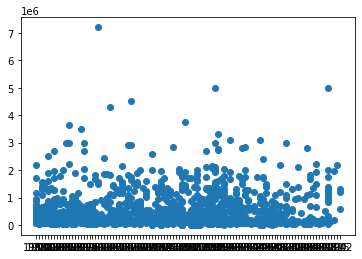

In [20]:
plt.scatter(new_housing_df.YearBuilt, new_housing_df.SalePrice)

<function matplotlib.pyplot.show(close=None, block=None)>

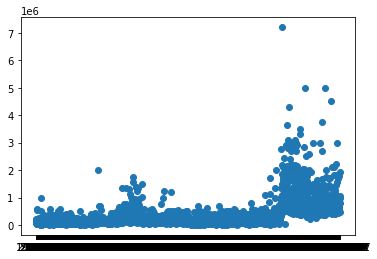

In [21]:
plt.scatter(new_housing_df.FinishedArea, new_housing_df.SalePrice)
plt.show

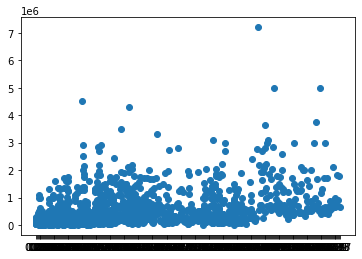

In [22]:
plt.scatter(new_housing_df.Acreage, new_housing_df.SalePrice)

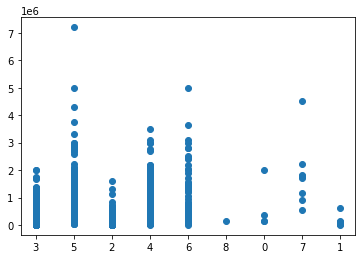

In [23]:
plt.scatter(new_housing_df.Bedrooms, new_housing_df.SalePrice)

In [24]:
# Split our preprocessed data into our features and target arrays
y = new_housing_df['SalePrice'].values
X = new_housing_df.drop('SalePrice',1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
#Create a linear regression model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Fitting our model with all our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.7632302673465716


In [30]:
predictions = model.predict(X_test)
importance = model.coef_

In [31]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.7632302673465716
Testing Data Score: 0.7651521828593948


Feature: 0, Score: 22235.38399
Feature: 1, Score: 177.58575
Feature: 2, Score: -803.95013
Feature: 3, Score: -46472.36435
Feature: 4, Score: 19070.23045
Feature: 5, Score: 6968.92724
Feature: 6, Score: -3996.82242
Feature: 7, Score: -223.65760
Feature: 8, Score: 54732.18181
Feature: 9, Score: 38259.72215
Feature: 10, Score: 92991.90397
Feature: 11, Score: -93528.26029
Feature: 12, Score: -134408.84433
Feature: 13, Score: -38259.72215
Feature: 14, Score: -142040.38936
Feature: 15, Score: 41022.99892
Feature: 16, Score: -21993.32014
Feature: 17, Score: -32738.86167
Feature: 18, Score: -116021.70390
Feature: 19, Score: 491544.16954
Feature: 20, Score: 46423.93338


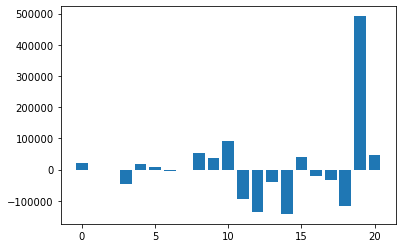

In [32]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [28]:
# END OF PROJECT

In [ ]:
#Create Schools DataFrame
schools_list = []
for row in cursor.execute("SELECT * FROM MNPS_Enrollment_Data"):
    schools_list.append(row)


schools_df = pd.DataFrame(schools_list)
schools_df.columns = ["SchoolLevel","SchoolName","ZipCode","Rank","Greatschoolsrating","TotalEnrollment","AmericanIndianorAlaskaNative","Asian","BlackorAfricanAmerican","Hispanic/Latino","NativeHawaiianorOtherPacificIslander","White","StudentswithDisabilities"]
schools_df.head()

In [ ]:
#Create Schools DataFrame
restaurant_list = []
for row in cursor.execute("SELECT * FROM Nashville_Restaurants"):
    restaurant_list.append(row)


restaurant_df = pd.DataFrame(restaurant_list)
restaurant_df.columns = ["Restaurant Name","Neighborhood","Address","ZIP Code","Description"]
restaurant_df.head()

In [ ]:
restaurant_per_zip = restaurant_df.groupby('ZIP Code').size()
restaurant_per_zip

In [ ]:
new_restaurants_df = pd.DataFrame(restaurant_per_zip, columns=["RestaurantsPerZip"], index=restaurant_per_zip.index)
new_restaurants_df 